#  PEC3: Machine Learning

 

El primer paso que debéis pensar, es qué variables os resultan de interés en vuestra clasificación/predicción, como por ejemplo pueden ser los metros cuadrados de la vivienda. Por temas de rendimiento se recomienda no utilizar más de 6 variables. La PEC2 debería facilitaros este proceso, ya que habéis analizado ya las variables del dataset.



In [1]:
# comenzamos cargando las librerías que utilizaremos posteriormente

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# leemos el dataset y comprobamos que se haya leído correctamente

data = pd.read_csv('dsanchezcorb_BBDD_PEC3.csv')
data.head()

,numPhotos,floor,price,propertyType,size,exterior,rooms,bathrooms,province,latitude,...,status,newDevelopment,hasLift,priceByArea,hasPlan,has3DTour,has360,hasStaging,parkingSpace,newDevelopmentFinished
0,23,6,370000,flat,77,True,3,2,Barcelona,41.379274,...,good,False,True,4805.0,False,False,False,False,False,False
1,19,9,375000,flat,97,True,2,2,Barcelona,41.410828,...,good,False,True,3866.0,False,False,False,False,False,False
2,18,1,684480,flat,118,False,3,2,Barcelona,41.393423,...,good,False,True,5801.0,False,False,False,False,False,False
3,33,0,222000,flat,69,True,3,1,Barcelona,41.416473,...,good,False,False,3217.0,False,False,False,False,False,False
4,13,bj,158000,duplex,75,True,1,1,Barcelona,41.381006,...,good,False,False,2107.0,False,False,False,False,False,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   numPhotos               10868 non-null  int64  
 1   floor                   10868 non-null  object 
 2   price                   10868 non-null  int64  
 3   propertyType            10868 non-null  object 
 4   size                    10868 non-null  int64  
 5   exterior                10868 non-null  bool   
 6   rooms                   10868 non-null  int64  
 7   bathrooms               10868 non-null  int64  
 8   province                10868 non-null  object 
 9   latitude                10868 non-null  float64
 10  longitude               10868 non-null  float64
 11  showAddress             10868 non-null  bool   
 12  distance                10868 non-null  int64  
 13  hasVideo                10868 non-null  bool   
 14  status                  10868 non-null

In [4]:
# comprobamos que no exista ningún nulo

data.isnull().sum()

numPhotos                 0
floor                     0
price                     0
propertyType              0
size                      0
exterior                  0
rooms                     0
bathrooms                 0
province                  0
latitude                  0
longitude                 0
showAddress               0
distance                  0
hasVideo                  0
status                    0
newDevelopment            0
hasLift                   0
priceByArea               0
hasPlan                   0
has3DTour                 0
has360                    0
hasStaging                0
parkingSpace              0
newDevelopmentFinished    0
dtype: int64

## Pregunta 1: Aprendizaje No Supervisado (40 puntos)

Se pide crear un modelo KMEANS para clasificar las viviendas del conjunto de datos y representarlo gráficamente en el propio Notebook de Python. En este caso debéis tener en cuenta el número de clusters (k) que queréis que tenga vuestro modelo, podéis poner el que consideréis, pero se recomienda utilizar el llamado “elbow method” para estimarlo.

In [5]:
# Para empezar creí oportuno hacer un estudio de que variables tenían mas peso en la varianza de las que a simple vista pudieran parecer mas interesantes
# comenzamos creando un dataset con solo estas variables

variables_interesantes = ['price', 'size', 'rooms', 'distance', 'exterior', 'hasLift', 'priceByArea']
data_kmeans = data.loc[:, variables_interesantes]
data_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        10868 non-null  int64  
 1   size         10868 non-null  int64  
 2   rooms        10868 non-null  int64  
 3   distance     10868 non-null  int64  
 4   exterior     10868 non-null  bool   
 5   hasLift      10868 non-null  bool   
 6   priceByArea  10868 non-null  float64
dtypes: bool(2), float64(1), int64(4)
memory usage: 445.9 KB


In [6]:
# a continuación procedemos a estandarizar los datos
scaler = StandardScaler()
data_kmeans_estandarizada = scaler.fit_transform(data_kmeans)

# realizamos una PCA
modelo_pca = PCA()
modelo_pca.fit(data_kmeans_estandarizada)

# obtenemos los vectores de carga de las variables en los componentes principales
vectores_carga = modelo_pca.components_

# creamos e imprimos un DataFrame para mostrar las contribuciones de cada variable en valor absoluto
contribuciones = pd.DataFrame(vectores_carga.T, columns=[f'PC{i+1}' for i in range(len(variables_interesantes))])
contribuciones.index = variables_interesantes
contribuciones_abs = contribuciones.abs()
print(contribuciones_abs)

                  PC1       PC2       PC3       PC4       PC5       PC6  \
price        0.101596  0.692466  0.222608  0.150900  0.087405  0.141001   
size         0.505699  0.396092  0.065823  0.082779  0.026100  0.614772   
rooms        0.384445  0.419181  0.279868  0.314285  0.019570  0.703557   
distance     0.318821  0.036770  0.228140  0.900376  0.091194  0.159907   
exterior     0.364960  0.087654  0.596762  0.070959  0.695956  0.106756   
hasLift      0.354564  0.195085  0.561306  0.085132  0.704651  0.129545   
priceByArea  0.474964  0.375229  0.380197  0.220550  0.045724  0.231155   

                  PC7  
price        0.640565  
size         0.444488  
rooms        0.063336  
distance     0.019751  
exterior     0.047000  
hasLift      0.024482  
priceByArea  0.620401  


In [7]:
# del estudio de los resultados anteriores, decido que las variables con mas carga asociada son 'size', 'rooms' y 'priceByArea'
# y creo un nuevo dataframe para ellas

variables_definitivas = ['size', 'rooms', 'priceByArea']
data_kmeans_def = data.loc[:, variables_definitivas]
data_kmeans_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   size         10868 non-null  int64  
 1   rooms        10868 non-null  int64  
 2   priceByArea  10868 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 254.8 KB


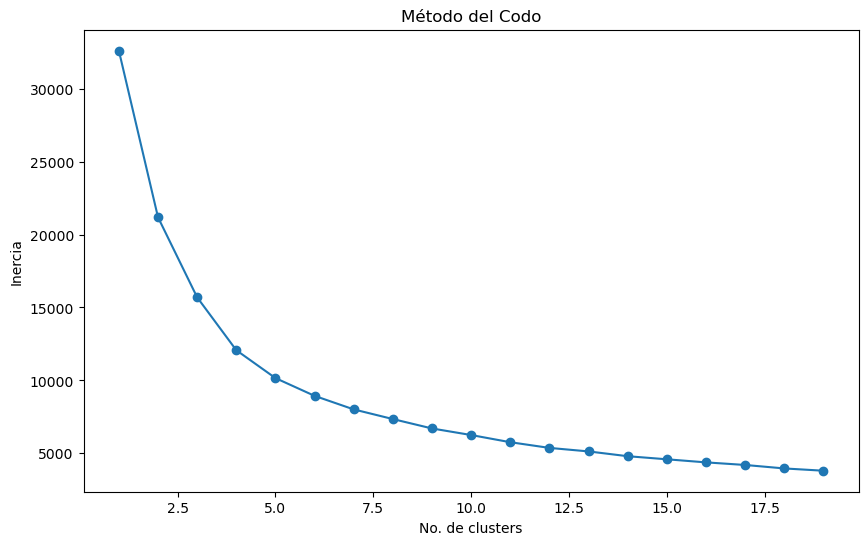

In [8]:
# en este paso vamos a utilizar el método del codo para discernir cual es la 'k' más oportuna para realizar el kmeans
# pero antes, MUY importante vamos a estandarizar los valores para que al encontrarnos con variables con diferentes escalas, 
# ninguna domine el cálculo de las distancias afectando así al resultado del clustering

scaler = StandardScaler()
data_kmeans_estandarizada = scaler.fit_transform(data_kmeans_def)
X = data_kmeans_estandarizada.copy()

inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    
#Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

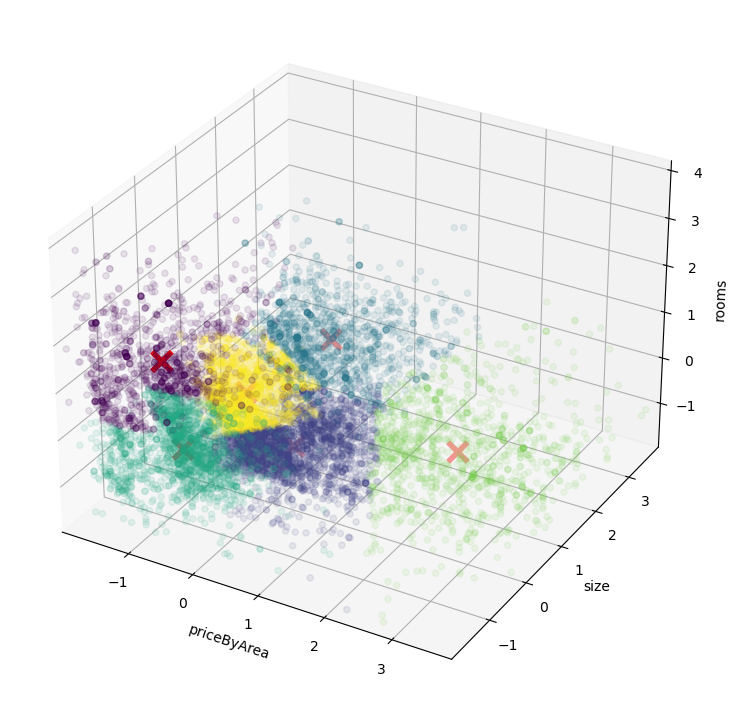

In [9]:
# del gráfico resultando, decidimos que la 'k' idónea será 6
# implementamos el algoritmo k-means, se lo aplicamos a nuestro dataset seleccionado y con los centroides y las etiquetas creamos un gráfico en 3D

algoritmo = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
algoritmo.fit(X)
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

fig = plt.figure(figsize=(12, 9))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=etiquetas, marker='o', alpha=0.1)
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker='x', s=200, linewidths=4, c='red')

ax.set_xlim(min(X[:, 0]), max(X[:, 0]))
ax.set_ylim(min(X[:, 1]), max(X[:, 1]))
ax.set_zlim(min(X[:, 2]), max(X[:, 2]))

ax.set_xlabel('priceByArea')
ax.set_ylabel('size')
ax.set_zlabel('rooms')

plt.show()


El resultado es un poco decepcionante porque al ser en 3D los puntos mas lejanos quedan ocultos ante la nube, llegando
a tapar incluso a algunos centroides. 

Ante lo cual, decido cambiar de método y hacer primero el k-means de todas las variables que creo más interesantes, para posteriormente realizar una PCA para poder hacer el gráfico en dos dimensiones

In [10]:
# Volvemos a crear un dataset con solo las variables que creemos mas interesantes

variables_interesantes = ['price', 'size', 'rooms', 'exterior', 'hasLift', 'priceByArea']
data_kmeans = data.loc[:, variables_interesantes]
data_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        10868 non-null  int64  
 1   size         10868 non-null  int64  
 2   rooms        10868 non-null  int64  
 3   exterior     10868 non-null  bool   
 4   hasLift      10868 non-null  bool   
 5   priceByArea  10868 non-null  float64
dtypes: bool(2), float64(1), int64(3)
memory usage: 361.0 KB


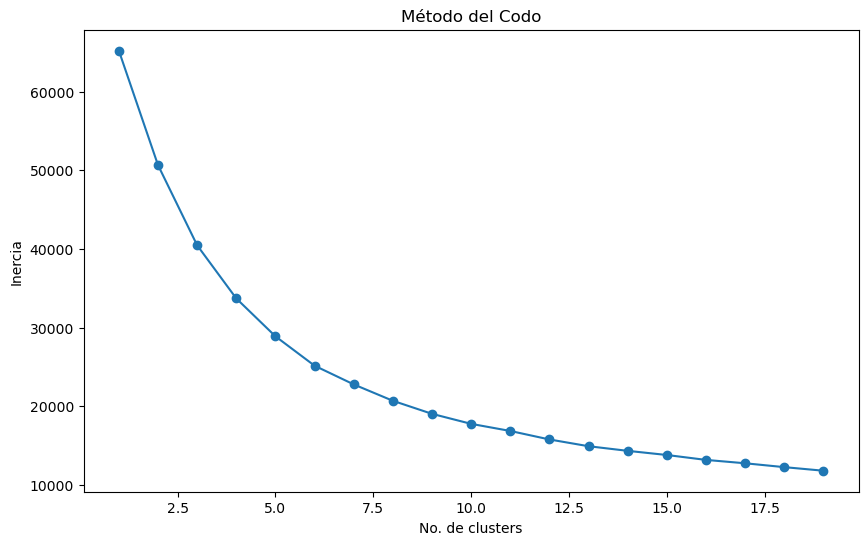

In [11]:
#estandarizamos los valores y recurrimos al metodo del codo para decidir la mejor 'k'

scaler = StandardScaler()
data_estandarizada = scaler.fit_transform(data_kmeans)

X = data_estandarizada.copy()
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)

plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

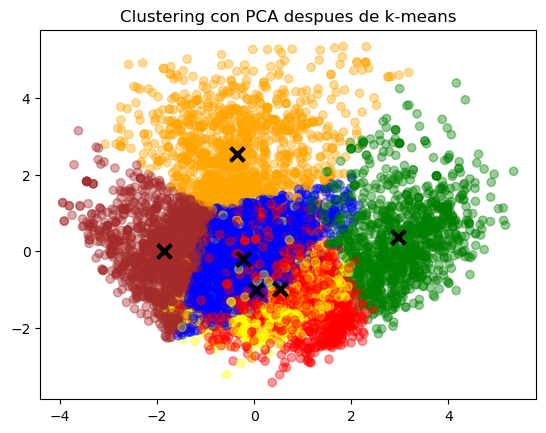

In [12]:
# corremos el algoritmo de k-means para k=6 y posteriormente mendiante PCA reducimos las dimensiones a 2, incluidos centroides.

algoritmo = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10)
algoritmo.fit(X)
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
centroides_pca = modelo_pca.transform(centroides)

colores = ['blue', 'red', 'green', 'orange', 'brown', 'yellow']
colores_cluster = [colores[etiquetas[i]] for i in range(len(etiquetas))]

plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, marker = 'o',alpha = 0.4)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker = 'x', s = 100, linewidths = 3, c = 'black')
plt.title('Clustering con PCA despues de k-means')
plt.show()

El problema esta vez es que al reducir las dimensiones después de haber hecho el k-means, algunos puntos de un cluster
quedan dentro de otros en el gráfico, creando mucho ruido y no diferenciando bien algunos clusteres centrales. 

Viendo este resultado, por último decido hacer una primero una PCA de mi dataset reduciendo a 2 las dimensiones, para posteriormente utilizar k-means para encontrar los clusters y sus centroides.

Veamos los resultados ;-)

In [13]:
variables_interesantes = ['price', 'size', 'rooms', 'exterior', 'hasLift', 'priceByArea']
data_kmeans = data.loc[:, variables_interesantes]
data_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        10868 non-null  int64  
 1   size         10868 non-null  int64  
 2   rooms        10868 non-null  int64  
 3   exterior     10868 non-null  bool   
 4   hasLift      10868 non-null  bool   
 5   priceByArea  10868 non-null  float64
dtypes: bool(2), float64(1), int64(3)
memory usage: 361.0 KB


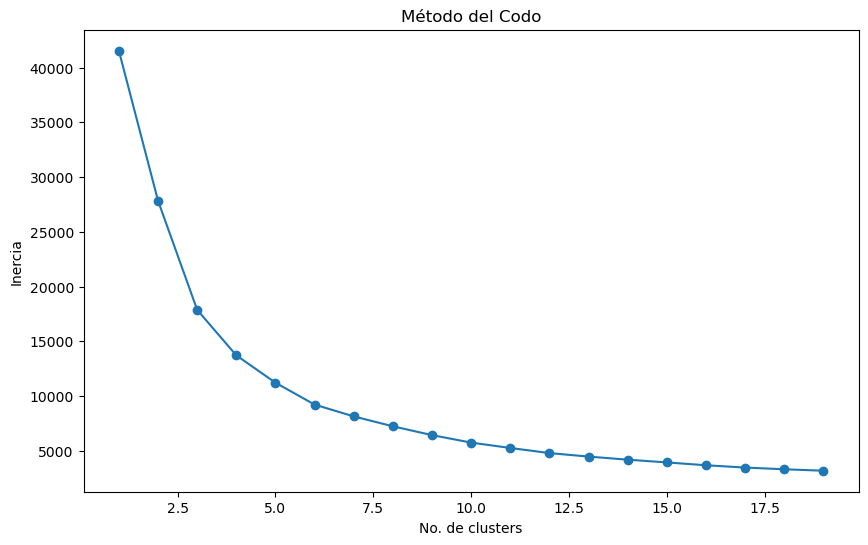

In [14]:
# esta vez haremos la PCA antes del k-means

scaler = StandardScaler()
data_estandarizada = scaler.fit_transform(data_kmeans)
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(data_estandarizada)
pca = modelo_pca.transform(data_estandarizada)
X = pca.copy()
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

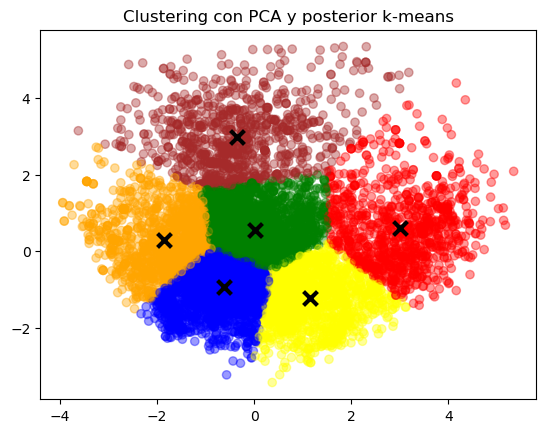

In [15]:
# ya solo falta k-means y pìntar

algoritmo = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10)
algoritmo.fit(X)
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_
colores = ['blue', 'red', 'green', 'orange', 'brown', 'yellow']
colores_cluster = [colores[etiquetas[i]] for i in range(len(etiquetas))]
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, marker = 'o',alpha = 0.4)
plt.scatter(centroides[:, 0], centroides[:, 1], marker = 'x', s = 100, linewidths = 3, c = 'black')
plt.title('Clustering con PCA y posterior k-means')
plt.show()

Voilà!!! Por fin el resultado deseado.

# Pregunta 2: Aprendizaje Supervisado (40 puntos)

Se pide crear un modelo Linear Regression, para ello se deberá entrenar con el 80% del conjunto de datos (training set).
Posteriormente se comprobará la precisión del modelo entrenado con el 20% restante (testing set).

In [16]:
# Para llevar a cabo este cometido, primero obtenemos la variable dependiente (target)
y = data['price']

# a continuación declaramos las variable independientes y las estandarizamos.
# al igual que hicimos en k-means para asegurarse de que todas estan en la misma escala y que no domine una sobre otras
X = data[['size', 'rooms', 'distance', 'exterior', 'hasLift']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# llegados aquí dividimos el dataFrame en conjuntos de entrenamiento y prueba en una proporción 80/20
# añadimos el random_state para garantizarnos que la obtenemos los mismos conjuntos de 'train' y 'test' en diferentes ejecuciones del código
# 42 forever!!! aunque seamos realistas y en este caso el valor númerico de random_state no tiene significado específico.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
regresion = LinearRegression()

# lo entrenamos utilizando solo el conjunto 'train'
regresion.fit(X_train, y_train)

# para posteriormente hacer predicciones utilizando el conjunto de prueba
y_prediccion = regresion.predict(X_test)


# imprimimos los coeficientes de cada variable
columnas = X.columns
for nombre_columna, coeficiente in zip(columnas, regresion.coef_):
    print("Coeficiente " + nombre_columna + ": \t", coeficiente)

# y para terminar el coeficiente de determinación (R2) que nos determinará que proporción de la varianza de 'precio' es explicada por el modelo obtenido
print("\nCoeficiente de determinación:", regresion.score(X_test, y_test))


Coeficiente size: 	 72804.90305174464
Coeficiente rooms: 	 7088.436626569635
Coeficiente distance: 	 -24909.219117405388
Coeficiente exterior: 	 11035.686278026064
Coeficiente hasLift: 	 32473.357671687256

Coeficiente de determinación: 0.2042780129760553


De estos resultados vemos que, como ya podíamos preveer, la variable 'size' es la que mas peso tiene en el precio de una vivienda, seguida a distancia de la existencia de ascensor. Muy cerca se encuentra la distancia al centro de la ciudad, que como es lógico, cuanto mas lejos mas disminuye el precio y por eso es negativo el coeficiente.

Aun así podemos decir que todas estas variables no son suficientes para predecir el precio de una vivienda, pues su coeficiente de determinación está muy lejano a 1. Supongo que esto es debido a la gran variedad de la busqueda inicial, es claro que hubiese sido mas efectivo centrarse quizás en una provincia, en un tipo de vivienda especifico y poder comprobar el peso de la ubicación de la vivienda por barrios en el precio final. Pero esto conllevaba la creacción de muchas variables dummies aumentando exponencialmente los requerimientos de espacio, tiempo y potencia del procesador.

# Pregunta 3: Evaluación de Modelos (20 puntos)

Una vez creado el modelo Linear Regression, vamos a evaluar gráficamente la precisión del modelo.
Para ello se pide representar con alguna librería de Python de las vistas en el primer Módulo tanto 
el resultado conocido del testing set vs el resultado que predice el modelo para ese mismo conjunto de datos.

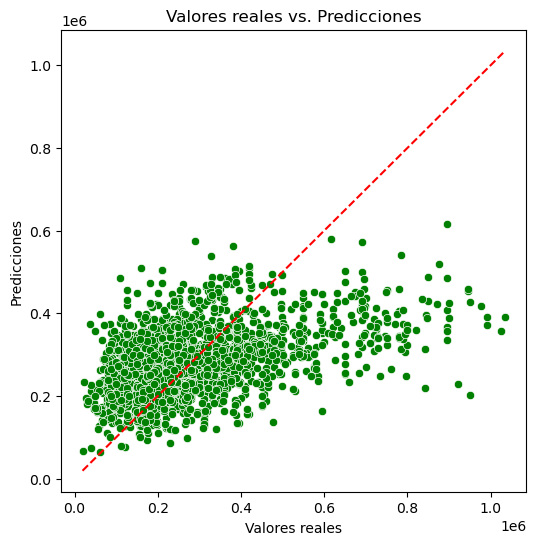

In [17]:
# Para evaluar gráficamente la precisión del modelo lo que haremos será crear el gráfico de dispersión
# En el que cada punto corresponde a los valores reales del precio de la vivienda y al valor predicho por el modelo

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_prediccion, color="g")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')

plt.title("Valores reales vs. Predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

plt.show()

Lo que esperariamos encontrar en un modelo ideal sería que el máximo número posible de puntos estuviese cerca de la diagonal pintada en rojo y dividos simetricamente.
A simple vista puede parecer que la gran nube de puntos está bien divida aunque cierto es,que parece que por el lado derecho se dispersan mas los puntos.
Para asegurarnos representaremos otro gráfico muy utilizado en estas prácticas en el que se tiene en cuenta la diferencia entre el valor real y el valor predicho.

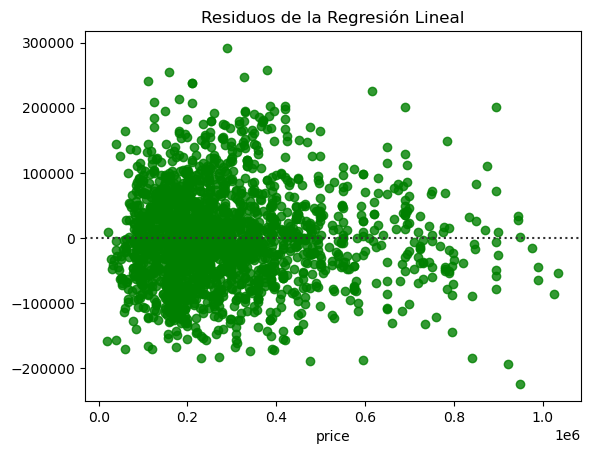

In [18]:
# Para asegurarnos representaremos otro gráfico muy utilizado en estas prácticas
#  en el que se tiene en cuenta la diferencia entre el valor real y el valor predicho

sns.residplot(x = y_test, y = y_prediccion, color="g")
plt.title("Residuos de la Regresión Lineal")
plt.show()

Objetivamente podemos decir que el modelo es válido puesto que los puntos estan dispersos bastante equitativamente a un lado y al otro de la línea.

C'est fini!!!